In [1]:
# @markdown Colab // Kaggle installation (Part 1)

! git clone https://github.com/neuromatch/ComputationThruDynamicsBenchmark
%cd ComputationThruDynamicsBenchmark
! pip install -e .

## RUN THIS CELL, THEN RESTART SESSION AS PROMPTED (BUTTON AT BOTTOM OF THIS CELL'S FINISHED OUTPUT). DO NOT NEED TO RUN AGAIN
## PLEASE RESTART THE ENVIRONMENT FOR KAGGLE MANUALLY (Run > Restart & clear cell outputs)

Cloning into 'ComputationThruDynamicsBenchmark'...
remote: Enumerating objects: 3359, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 3359 (delta 208), reused 192 (delta 192), pack-reused 3126
Receiving objects: 100% (3359/3359), 296.10 MiB | 28.54 MiB/s, done.
Resolving deltas: 100% (1882/1882), done.
Updating files: 100% (262/262), done.
/content/ComputationThruDynamicsBenchmark
Obtaining file:///content/ComputationThruDynamicsBenchmark
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-

In [1]:
# @markdown Colab // Kaggle installation (Part 2)

!pip uninstall -y torchaudio torchvision

Found existing installation: torchaudio 2.3.1+cu121
Uninstalling torchaudio-2.3.1+cu121:
  Successfully uninstalled torchaudio-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121


In [2]:
# @markdown Colab // Kaggle installation (Part 3)

## GET BACK TO THE DIRECTORY AND CONFIGURE .env

################ COLAB #####################

%cd /content/ComputationThruDynamicsBenchmark/
envStr = """HOME_DIR=/content/ComputationThruDynamicsBenchmark/
#Don't change these
TRAIN_INPUT_FILE=train_input.h5\nEVAL_INPUT_FILE=eval_input.h5
EVAL_TARGET_FILE=eval_target.h5
"""

#############################################


################ COLAB // KAGGLE #####################

with open('.env','w') as f:
  f.write(envStr)

##############################################

/content/ComputationThruDynamicsBenchmark


In [3]:
# @markdown Colab // Kaggle installation (Part 4)

!git clone https://github.com/mitchellostrow/DSA
%cd DSA/
!pip install -e .

Cloning into 'DSA'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 340 (delta 16), reused 24 (delta 14), pack-reused 304
Receiving objects: 100% (340/340), 1.52 MiB | 12.74 MiB/s, done.
Resolving deltas: 100% (189/189), done.
/content/ComputationThruDynamicsBenchmark/DSA
Obtaining file:///content/ComputationThruDynamicsBenchmark/DSA
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 28.8 MB/s eta 0:00:00
  Running setup.py develop for DSA


In [4]:
# set the random seed for reproducibility
import random
import dotenv
import pathlib
import os
import logging

# comment the next three lines if you want to see all training logs
pl_loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict if 'pytorch_lightning' in name]
for pl_log in pl_loggers:
    logging.getLogger(pl_log.name).setLevel(logging.WARNING)

random.seed(2024)

dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
if HOME_DIR is None:
    HOME_DIR = ""
print(HOME_DIR)

/content/ComputationThruDynamicsBenchmark/


In [25]:
import pandas as pd

/content/ComputationThruDynamicsBenchmark/ctd/task_modeling/task_env/task_env.py:334: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(ang_targ, dtype=torch.float32, device=self.device)
/content/ComputationThruDynamicsBenchmark/ctd/task_modeling/task_env/task_env.py:338: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(angs, dtype=torch.float32, device=self.device)


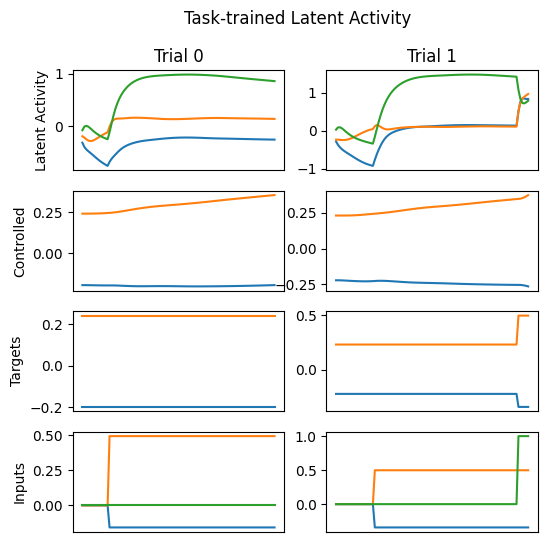

In [5]:
from ctd.comparison.analysis.tt.tt import Analysis_TT
Model_DIR = "/content/drive/MyDrive/NeuroAI24_SincereWindflower/"
fpath_RT_GRU_128 = Model_DIR + "Models/models_RT_GRU_128/"
# Create the analysis object:
analysis_RT_GRU_128 = Analysis_TT(
    run_name = "GRU_128_rt",
    filepath = fpath_RT_GRU_128)

analysis_RT_GRU_128.plot_trial_io(num_trials = 2)

In [20]:
import numpy as np

In [16]:
ics, inputs, targets = analysis_RT_GRU_128.get_model_inputs()
out_dict = analysis_RT_GRU_128.get_model_outputs()
latents = out_dict["latents"].detach().numpy()
hand_pos = out_dict["controlled"].detach().numpy()

In [17]:
from sklearn.linear_model import LinearRegression

# Make a hand position decoder
lats_flat = latents.reshape(-1, latents.shape[-1])
hand_pos_flat = hand_pos.reshape(-1, hand_pos.shape[-1])
hand_pos_decoder = LinearRegression().fit(lats_flat, hand_pos_flat)



In [25]:
#Make a hand velocity decoder
hand_vel = np.diff(hand_pos, axis=1)
lats_flat_vel = latents[:,1:,:].reshape(-1, latents.shape[-1]) #Adjust latents to match hand_vel
hand_vel_flat = hand_vel.reshape(-1, hand_vel.shape[-1])
hand_vel_decoder = LinearRegression().fit(lats_flat_vel, hand_vel_flat)

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

def fit_position_velocity_decoder(latents, pos):
    """
    Fit linear decoders for position and velocity using latent variables.

    Parameters:
    - latents: numpy array of shape (n_trials, n_time, n_latents)
    - hand_pos: numpy array of shape (n_trials, n_time, 2) for x and y hand positions
    - target_pos: numpy array of shape (n_trials, n_time, 2) for x and y target positions

    Returns:
    - hand_pos_decoder: LinearRegression model for hand positions
    - hand_vel_decoder: LinearRegression model for hand velocities
    - target_pos_decoder: LinearRegression model for target positions
    - target_vel_decoder: LinearRegression model for target velocities
    """

    # Reshape latent and position variables
    latents_flat = latents.reshape(-1, latents.shape[-1])
    pos_flat = pos.reshape(-1, pos.shape[-1])

    # Fit position linear decoder
    pos_decoder = LinearRegression().fit(lats_flat, hand_pos_flat)

    # Calculate velocity (difference) for hand and target positions
    vel = np.diff(pos, axis=1)

    # Exclude the last time step from position data to match velocity shape
    lats_flat_vel = latents[:,1:,:].reshape(-1, latents.shape[-1]) #Adjust latents to match hand_vel
    vel_flat = vel.reshape(-1, vel.shape[-1])

    # Fit velocity linear decoder
    vel_decoder = LinearRegression().fit(lats_flat_vel, vel_flat)

    return pos_decoder, vel_decoder


In [44]:
# get 70% of latents data and see what's the prediction error
  # Calculate the number of time points to keep
n_time_points = latents.shape[1]
n_keep = int(0.7 * n_time_points)

# Generate random indices for time points to keep
indices = np.random.choice(n_time_points, size=n_keep, replace=False)

# Sort indices to maintain temporal order within each trial
indices.sort()

# Extract data at the selected indices for each trial
latents_70 = latents[:, indices, :]

In [48]:
pos_70 = hand_pos[:, indices, :]

In [46]:
latents_70_pos_predict = hand_pos_decoder.predict(latents_70.reshape(-1, latents_70.shape[-1]))

In [51]:
# find the error for the decoding

position_decoding_error = np.hstack(pos_70.reshape(-1, pos_70.shape[-1]) - latents_70_pos_predict)

In [58]:
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
analysis_GRU_128_ttrt = TT_RandomTarget(
    run_name = "RT_GRU_128",
    filepath = fpath_RT_GRU_128)

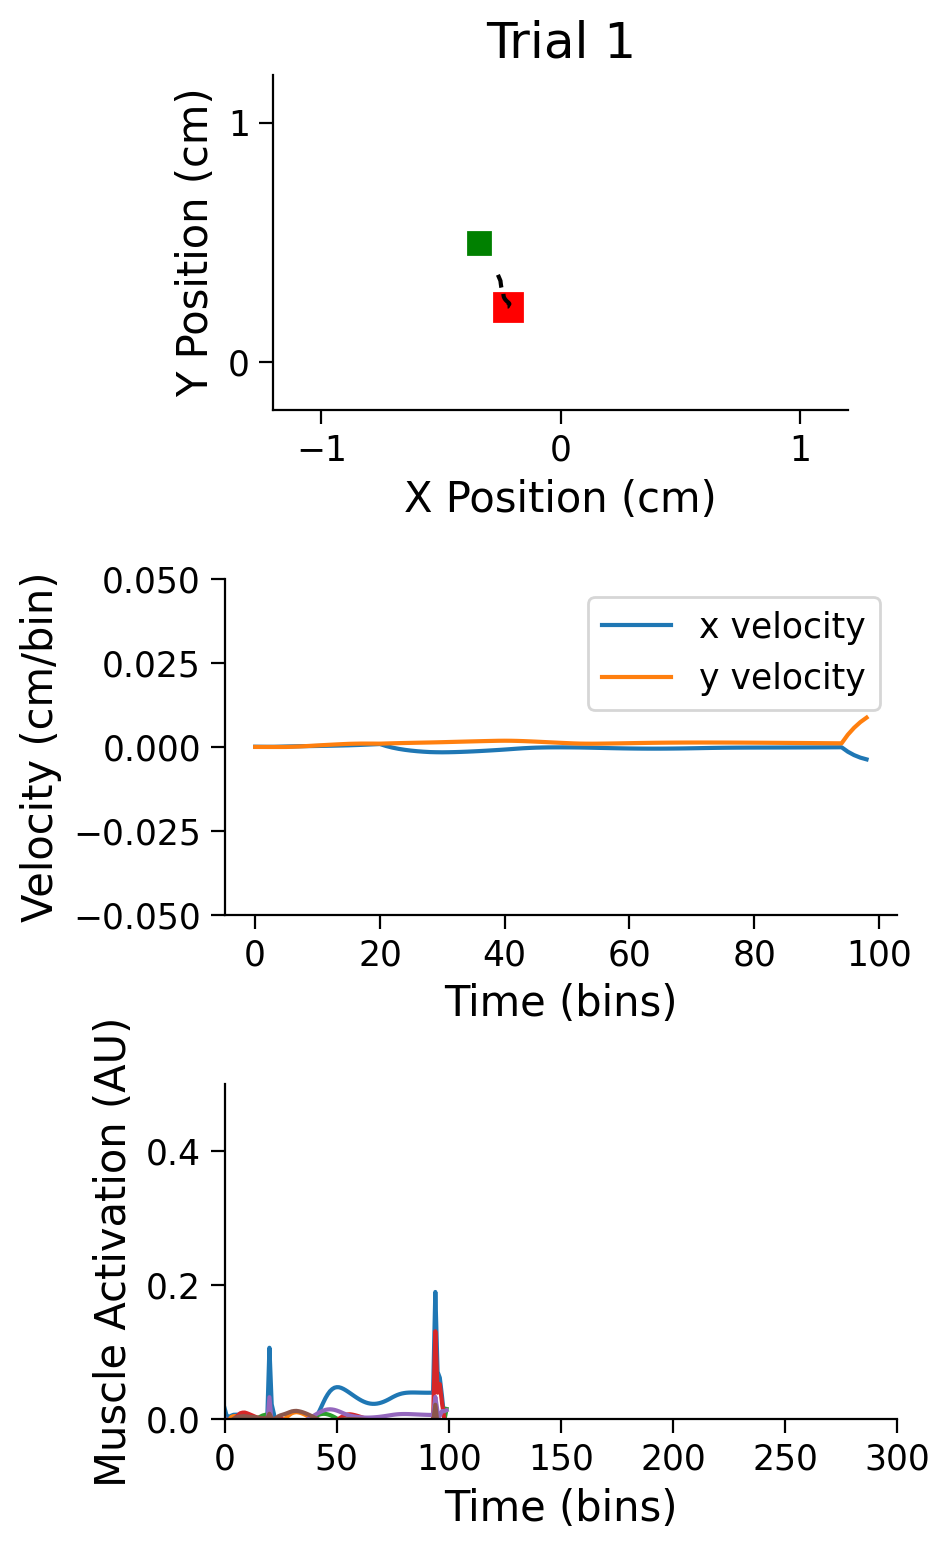

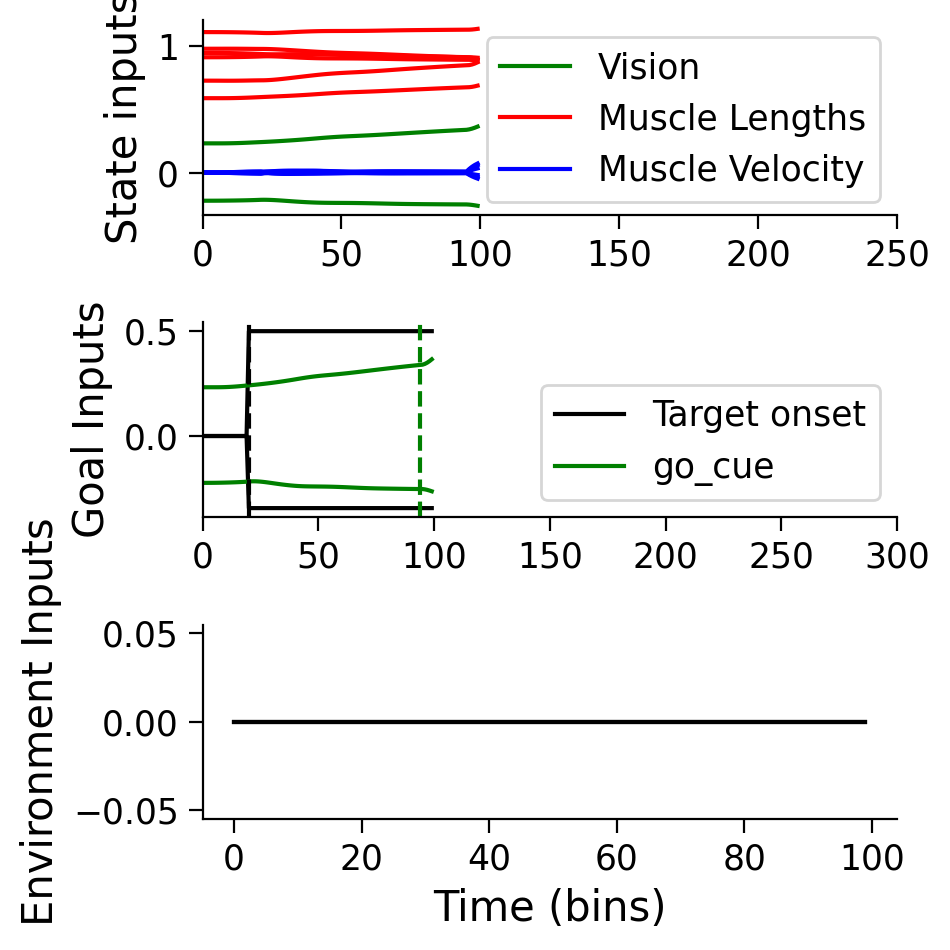

In [60]:
analysis_GRU_128_ttrt.plot_trial(1)

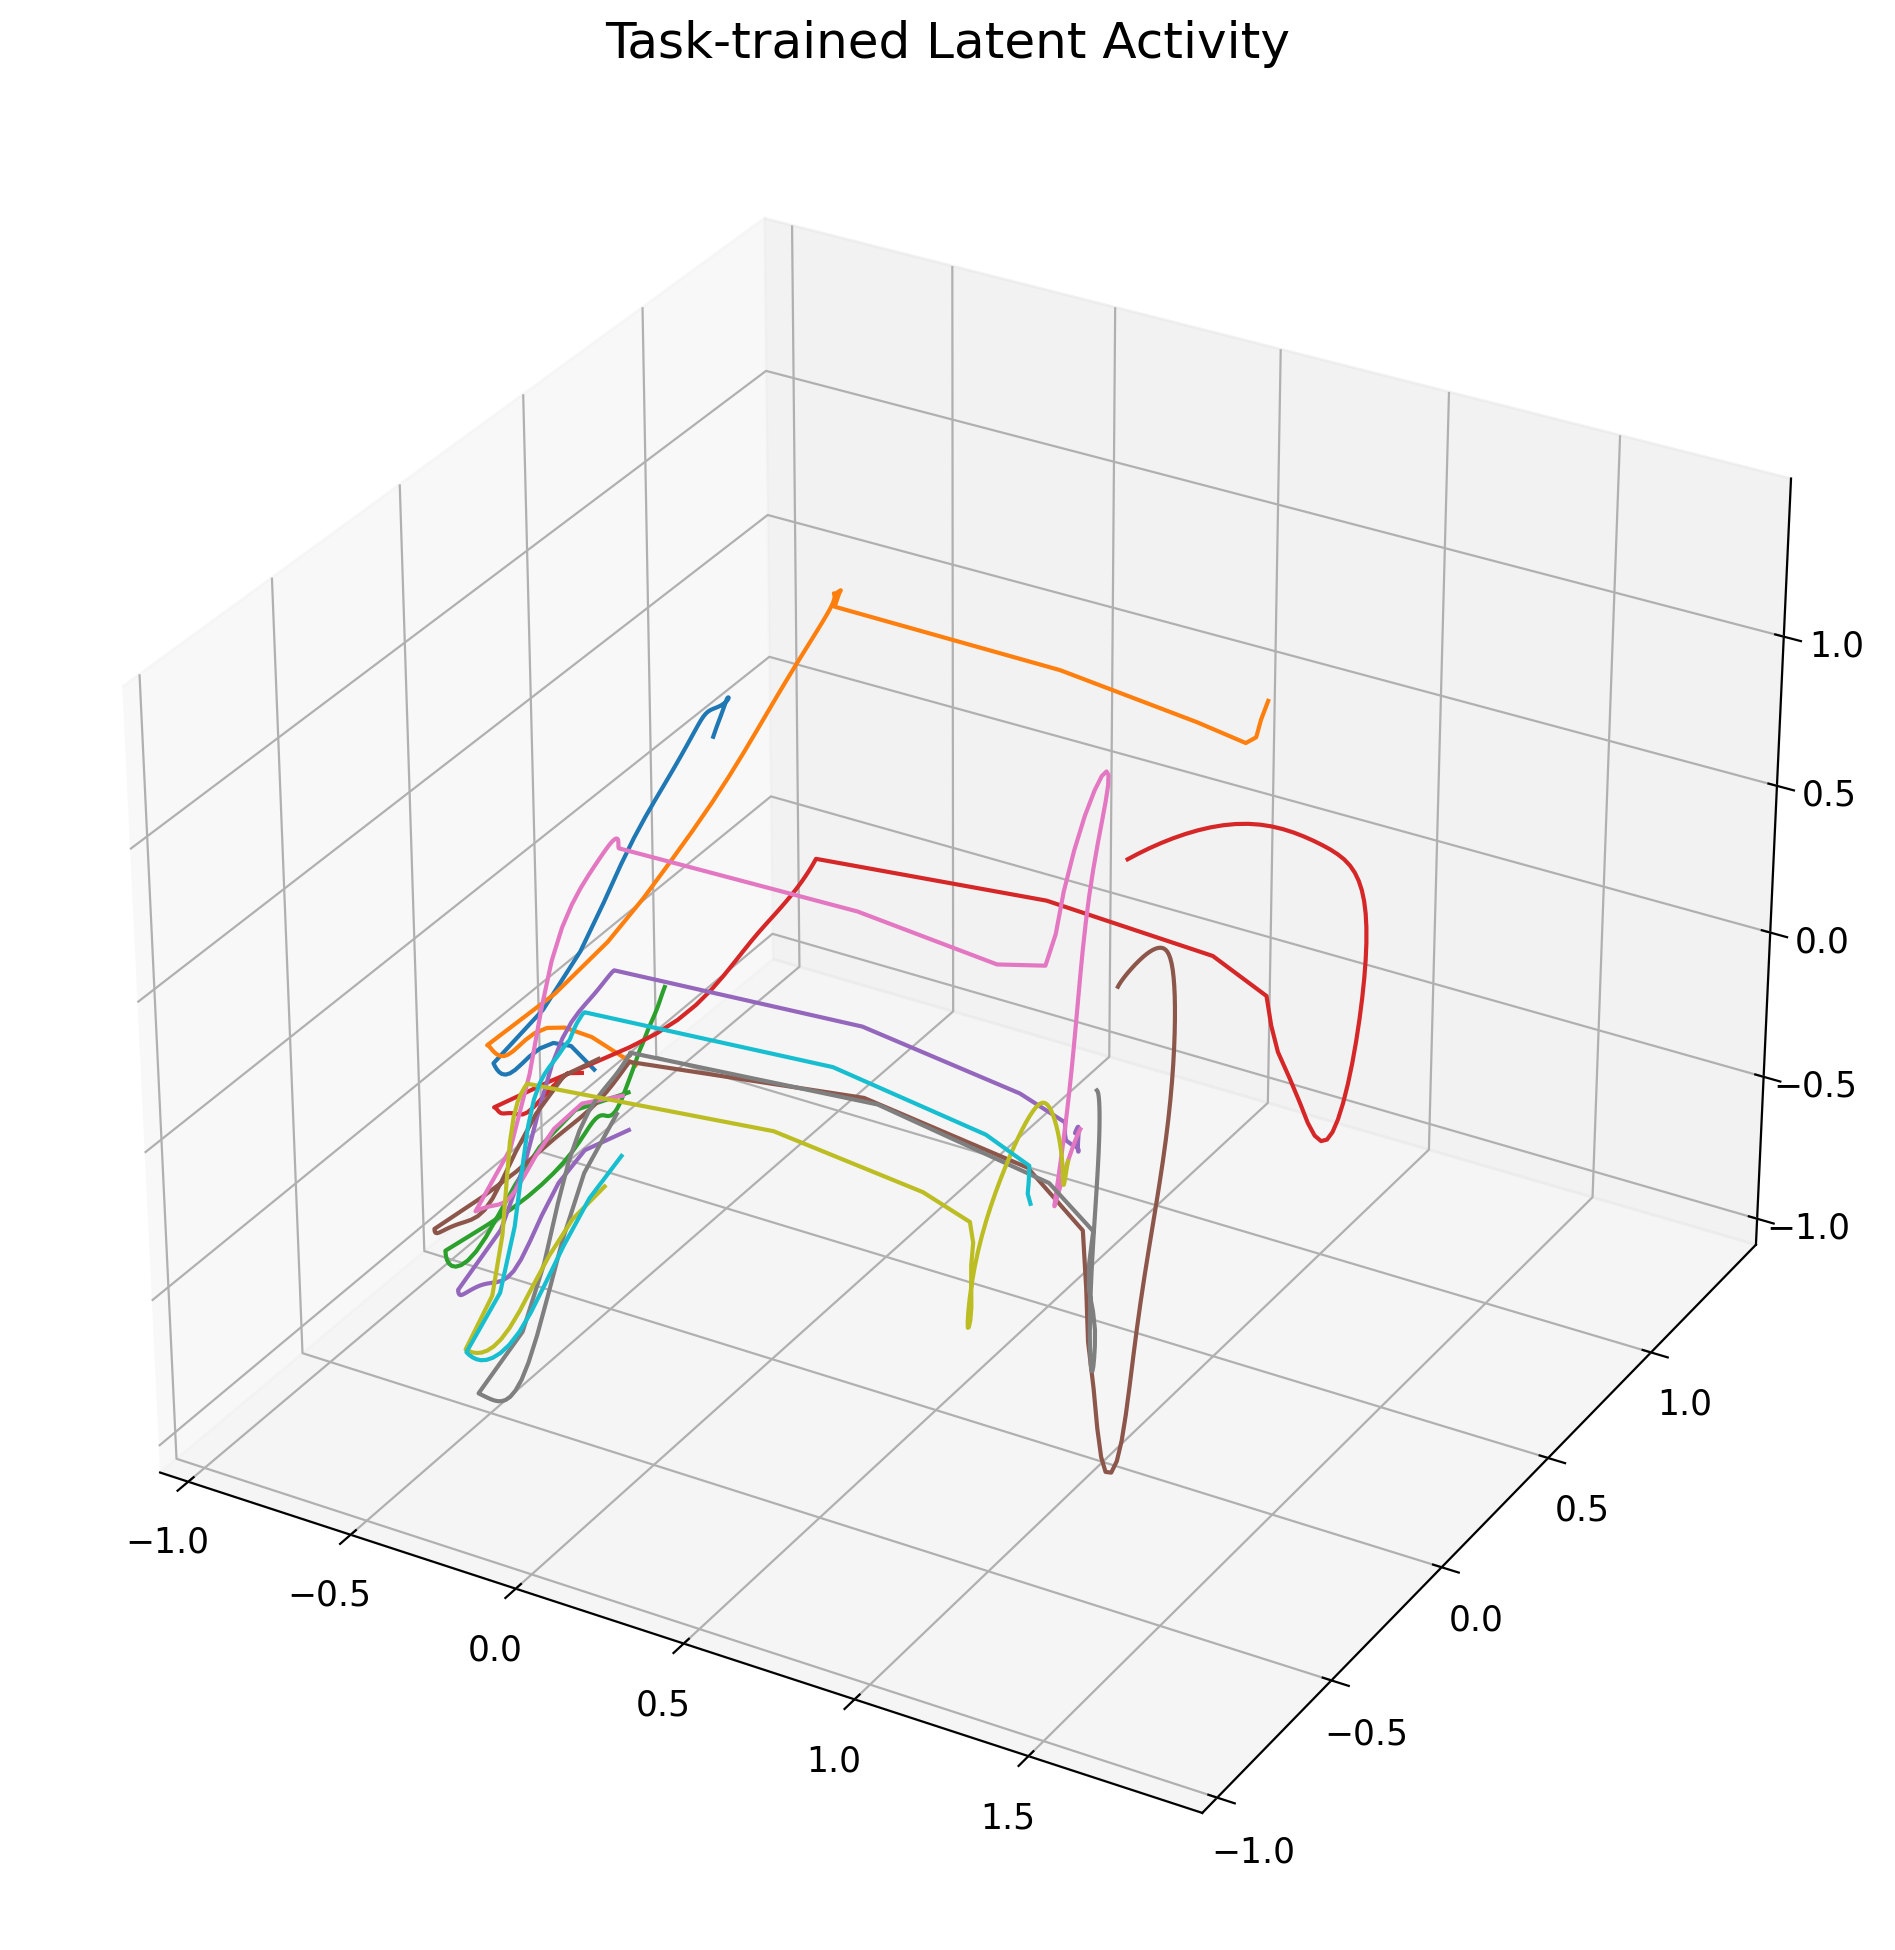

In [59]:
analysis_GRU_128_ttrt.plot_trial_latents()